In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pylab as pl
from librosa.feature import mfcc
import pywt
import time

In [46]:
data = pd.read_csv("train/03/PLC/plc.csv").values
velocity = []

In [47]:
csv_nos = set(data[:,-1])
for no in csv_nos:
    X = []
    Y = []
    Z = []
    times = []
    for d in data:
        if d[-1] is no:
            X.append(d[2])
            Y.append(d[3])
            Z.append(d[4])
            times.append(d[0])

    for i in range(int(len(X))-1):
        t = int(times[(i+1)].split(':')[-1]) - int(times[i].split(':')[-1]) + (int(times[(i+1)].split(':')[-2]) - int(times[i].split(':')[-2]))*1000
        p1 = np.array([X[i], Y[i], Z[i]])
        p2 = np.array([X[i+1], Y[i+1], Z[i+1]])
        l = np.sqrt(np.sum((p1 - p2)**2))
        if l/t < 3.0:
            velocity.append(l/t)

C:\Users\yuanli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


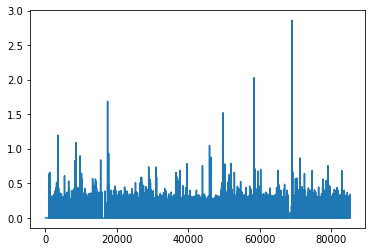

In [48]:
# df = pd.DataFrame({"kurtosis": ave, 'index': [i for i in range(len(ave))]})
# plt.imshow(np.flipud(spinde), cmap=plt.cm.jet, aspect=100, extent=[0,spinde.shape[1],0,spinde.shape[0]])
# sns.pairplot(df, y_vars='kurtosis', x_vars='index', size=12, aspect=1, kind='reg')
plt.plot([i for i in range(len(velocity))], velocity)
plt.show()